In [33]:
import pandas as pd

#for time series we are going to use a new library called statsmodel
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [34]:
Average_retail_price = pd.read_csv(r'C:\Users\Tracy\Downloads\Canna_project\rqtv-uenj.csv')

Average_retail_price

,SoldDate,AverageRetailPriceperOz,AverageRetailPriceperGm,Unit,CCCLastUpdated
0,1/31/2022,355.50,12.54,Grams,11/06/2023
1,4/25/2019,411.63,14.52,Grams,11/06/2023
2,3/7/2022,342.75,12.09,Grams,11/06/2023
3,6/30/2023,172.65,6.09,Grams,11/06/2023
4,7/24/2021,394.34,13.91,Grams,11/06/2023
...,...,...,...,...,...
1776,7/30/2020,407.10,14.36,Grams,11/06/2023
1777,8/4/2019,404.83,14.28,Grams,11/06/2023
1778,5/1/2021,398.03,14.04,Grams,11/06/2023
1779,9/23/2021,378.75,13.36,Grams,11/06/2023


In [35]:
cols = []

for i in range(len(Average_retail_price.columns)) :
    cols.append(Average_retail_price.columns[i].lower().replace(' ','_'))
Average_retail_price.columns = cols

Average_retail_price

,solddate,averageretailpriceperoz,averageretailpricepergm,unit,ccclastupdated
0,1/31/2022,355.50,12.54,Grams,11/06/2023
1,4/25/2019,411.63,14.52,Grams,11/06/2023
2,3/7/2022,342.75,12.09,Grams,11/06/2023
3,6/30/2023,172.65,6.09,Grams,11/06/2023
4,7/24/2021,394.34,13.91,Grams,11/06/2023
...,...,...,...,...,...
1776,7/30/2020,407.10,14.36,Grams,11/06/2023
1777,8/4/2019,404.83,14.28,Grams,11/06/2023
1778,5/1/2021,398.03,14.04,Grams,11/06/2023
1779,9/23/2021,378.75,13.36,Grams,11/06/2023


In [36]:
Average_retail_price.drop(['ccclastupdated'],axis=1 )

,solddate,averageretailpriceperoz,averageretailpricepergm,unit
0,1/31/2022,355.50,12.54,Grams
1,4/25/2019,411.63,14.52,Grams
2,3/7/2022,342.75,12.09,Grams
3,6/30/2023,172.65,6.09,Grams
4,7/24/2021,394.34,13.91,Grams
...,...,...,...,...
1776,7/30/2020,407.10,14.36,Grams
1777,8/4/2019,404.83,14.28,Grams
1778,5/1/2021,398.03,14.04,Grams
1779,9/23/2021,378.75,13.36,Grams


In [37]:
# Year 

# WIll make a new dataframe by calculiong the Number of new open license per year 

Average_retail_price['solddate'] = pd.to_datetime(Average_retail_price['solddate'])


Average_retail_price = Average_retail_price.sort_values(by='solddate')

# If you want to reset the index after sorting
Average_retail_price = Average_retail_price.reset_index(drop=True)
# first we will convert to  date and time lic start date .


# Canna_retail_by_Year = count(



In [38]:
Average_retail_price.dtypes

solddate                   datetime64[ns]
averageretailpriceperoz           float64
averageretailpricepergm           float64
unit                               object
ccclastupdated                     object
dtype: object

In [39]:
#since this is a TS, we make the date into the index
Average_retail_price.index = pd.DatetimeIndex(Average_retail_price['solddate'])
Average_retail_price

,solddate,averageretailpriceperoz,averageretailpricepergm,unit,ccclastupdated
solddate,,,,,
2018-11-19,2018-11-19,362.31,12.78,Grams,11/06/2023
2018-11-20,2018-11-20,383.00,13.51,Grams,11/06/2023
2018-11-21,2018-11-21,389.24,13.73,Grams,11/06/2023
2018-11-23,2018-11-23,409.93,14.46,Grams,11/06/2023
2018-11-24,2018-11-24,411.07,14.50,Grams,11/06/2023
...,...,...,...,...,...
2023-11-08,2023-11-08,164.71,5.81,Grams,11/06/2023
2023-11-09,2023-11-09,164.71,5.81,Grams,11/06/2023
2023-11-10,2023-11-10,164.14,5.79,Grams,11/06/2023


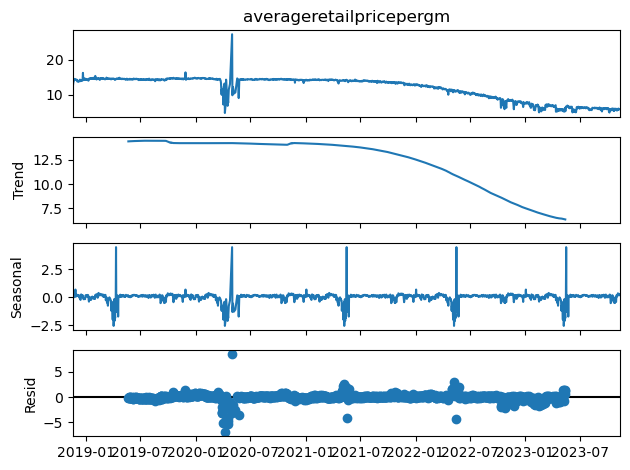

In [40]:
# seasonal decompose tries to check for multiple "potential" seasonal periods.
# in this case we have a monthly cycle 
decomp = sm.tsa.seasonal_decompose(Average_retail_price['averageretailpricepergm'],period=365)
decomp.plot()
plt.show()

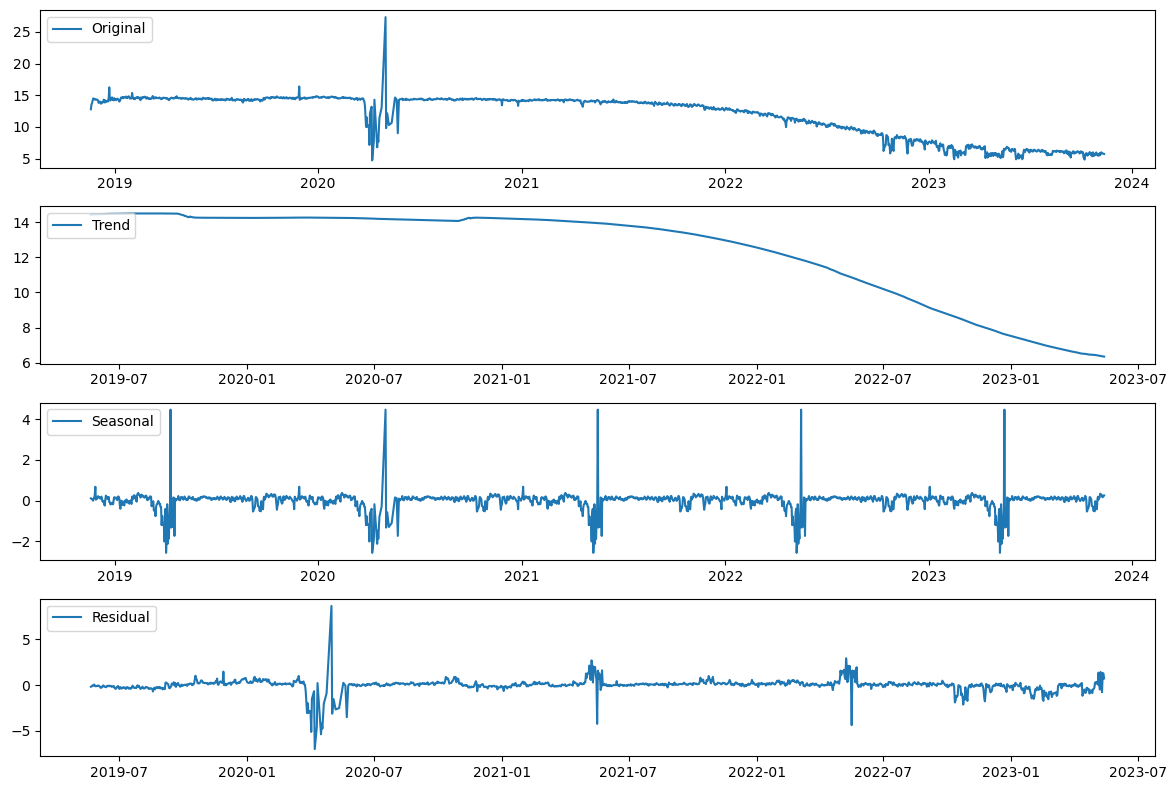

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming Product_Sales is your DataFrame with 'saledate' as the datetime index
Average_retail_price['solddate'] = pd.to_datetime(Average_retail_price['solddate'])
Average_retail_price.index = pd.DatetimeIndex(Average_retail_price['solddate'])

# Perform seasonal decomposition
decomp = sm.tsa.seasonal_decompose(Average_retail_price['averageretailpricepergm'], period=365)  # Assuming a monthly cycle

# Plot the decomposed components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(Average_retail_price['averageretailpricepergm'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


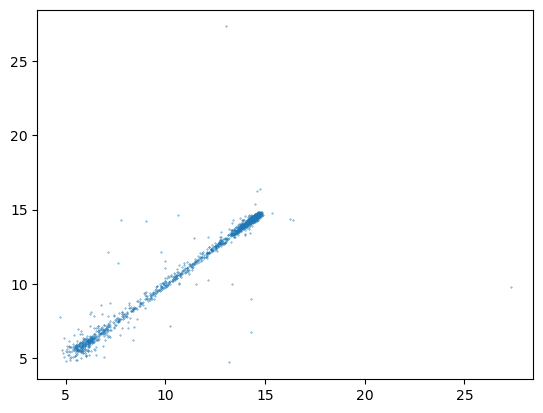

"Random Scatter: If the lag plot shows a random scatter of points, it suggests that the total price of weed sales on a particular day is not significantly correlated with the total price on the previous day. This could mean that each day's sales are independent of the previous day's sales.\nNo Clear Pattern: If there's no clear pattern in the lag plot, it could suggest that there is little to no autocorrelation between consecutive days' total sales."

In [42]:
# we want to check if there is a relation between consecutive datapoints. 
# this is a requisite for an AR model
plt.scatter(Average_retail_price['averageretailpricepergm'][:-1],Average_retail_price['averageretailpricepergm'][1:],s=0.1)
plt.show()


"""Random Scatter: If the lag plot shows a random scatter of points, it suggests that the total price of weed sales on a particular day is not significantly correlated with the total price on the previous day. This could mean that each day's sales are independent of the previous day's sales.
No Clear Pattern: If there's no clear pattern in the lag plot, it could suggest that there is little to no autocorrelation between consecutive days' total sales."""

In [43]:
# Check if the index is a datetime index
is_datetime_index = pd.api.types.is_datetime64_any_dtype(Average_retail_price.index)

# Display the result
print("Is datetime index:", is_datetime_index)


Is datetime index: True


In [44]:
Average_retail_price

,solddate,averageretailpriceperoz,averageretailpricepergm,unit,ccclastupdated
solddate,,,,,
2018-11-19,2018-11-19,362.31,12.78,Grams,11/06/2023
2018-11-20,2018-11-20,383.00,13.51,Grams,11/06/2023
2018-11-21,2018-11-21,389.24,13.73,Grams,11/06/2023
2018-11-23,2018-11-23,409.93,14.46,Grams,11/06/2023
2018-11-24,2018-11-24,411.07,14.50,Grams,11/06/2023
...,...,...,...,...,...
2023-11-08,2023-11-08,164.71,5.81,Grams,11/06/2023
2023-11-09,2023-11-09,164.71,5.81,Grams,11/06/2023
2023-11-10,2023-11-10,164.14,5.79,Grams,11/06/2023


In [51]:
# but from the ashes, we combine AR with MA and we get an actually decent model...
from statsmodels.tsa.arima.model import ARIMA

#create model
model = ARIMA(Average_retail_price['averageretailpricepergm'], order=(0,1,12))
# train model
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(start = len(Average_retail_price['averageretailpricepergm'])-10, end = len(Average_retail_price['averageretailpricepergm'])-1)
predictions

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


solddate
2023-11-03    5.736683
2023-11-04    5.678786
2023-11-05    5.574888
2023-11-06    5.555395
2023-11-07    5.821969
2023-11-08    5.916312
2023-11-09    5.645473
2023-11-10    5.789208
2023-11-11    5.767849
2023-11-12    5.838285
Name: predicted_mean, dtype: float64

In [52]:
from statsmodels.tsa.ar_model import AutoReg

# Assuming your DataFrame has a datetime index
start_date = Average_retail_price['solddate'].min()
end_date = Average_retail_price['solddate'].max() - pd.DateOffset(days=365) # Adjust the end date as needed

# Extract rows for the first four years
subset_data = len(Average_retail_price[start_date:end_date])

# Display the subset of data
print(subset_data)


1416


In [53]:
train = Average_retail_price['averageretailpricepergm'][:subset_data] 

test = Average_retail_price['averageretailpricepergm'][subset_data:]

In [54]:
# ahh, if life could always return models like this...
pd.DataFrame({'observed':test, 'predicted':predictions})

,observed,predicted
solddate,,
2022-11-13,8.40,NaN
2022-11-14,8.44,NaN
2022-11-15,8.29,NaN
2022-11-16,8.20,NaN
2022-11-17,8.39,NaN
...,...,...
2023-11-08,5.81,5.916312
2023-11-09,5.81,5.645473
2023-11-10,5.79,5.789208


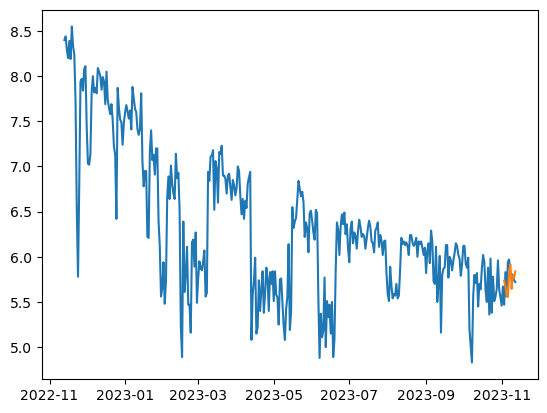

In [55]:
# and visually
plt.plot(test)
plt.plot(predictions)
plt.show()

In [56]:
#we expect this to be bad! Error alone in a step is a bad predictor of the value of the next step
from statsmodels.tsa.arima.model import ARIMA
#ARMA - Auto Regressive Moving Average

# no train-test à priori separation: "one step ahead" means that we predict for some timestamps but then use the real observation of 
# those timestamps to predict further 
# create model
model = ARIMA(Average_retail_price['solddate'], order=(0, 3, 12)) #The 0 her means we are not usring the AR capability of ARMA

#p: the number of lag observations in the model; also known as the lag order.
#d: the number of times that the raw observations are differenced; also known as the degree of differencing.
#q: the size of the moving average window; also known as the order of the moving average.

##NOTE ON d value : A model with one order of differencing assumes that the original series has a constant average trend 
#(e.g. a random walk or SES-type model, with or without growth). 
#A model with two orders of total differencing assumes that the original series has a time-varying trend 
#(e.g. a random trend or LES-type model).


# train model
model_fit = model.fit()
#make prediction
predictions = model_fit.predict(start = len(Average_retail_price['solddate'])-10, end= len(Average_retail_price['solddate'])-1)
predictions

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#create model
model = ARIMA(daily_sales['totalprice'], order=(2,0 ,12))
# train model
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(start = len(daily_sales['totalprice'])-10, end = len(daily_sales['totalprice'])-1)
predictions

d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


saledate
2023-11-03    5.356196e+06
2023-11-04    5.343968e+06
2023-11-05    4.476456e+06
2023-11-06    4.271011e+06
2023-11-07    4.582804e+06
2023-11-08    4.749317e+06
2023-11-09    4.913287e+06
2023-11-10    5.398305e+06
2023-11-11    5.324962e+06
2023-11-12    4.615972e+06
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming count_per_year_df is your time series DataFrame with 'Month' as the index
# Make sure the DataFrame has 'count' as the target variable

# Fit the ARIMA model
# Here, order=(p, d, q), where p, d, and q are the AR order, differencing order, and MA order, respectively.
order = (3, 1, 48)  # Adjust order based on your analysis
model = ARIMA(train, order=order)
results = model.fit()

# Forecast future values
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [ ]:


# Assuming count_per_year_df is your time series DataFrame with 'Month' as the index
# Make sure the DataFrame has 'count' as the target variable

# Split the data into training and testing sets


# Fit the ARIMA model
# Here, order=(p, d, q), where p, d, and q are the AR order, differencing order, and MA order, respectively.
order = (1, 1, 12)  # Adjust order based on your analysis
model = ARIMA(train['totalsale'], order=order)
results = model.fit()

# Forecast future values
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['totalsale'], label='Train')
plt.plot(test['totalsale'], label='Test')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


NameError: name 'count_per_year_df' is not defined